<a href="https://www.kaggle.com/code/leonardoterra/eda-domestic-violence?scriptVersionId=217833890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Dataset**
--

# **Domestic Violence Dataset**
    Statistical EDA & Machine Learning Classification models

## Data Description
This dataset contains information about individuals and their relationship with domestic violence.

## Column Descriptions
i. **Age:**

Data Type: Integer, Description: Represents the age of the individual in years.

ii. **Education:**

Data Type: Object, Description: Indicates the education level of the individual.

iii. **Employment:**

Data Type: Object, Description: Indicates if the individual is employed, semi-employed or unemployed.

iv. **Income:**

Data Type: Float, Description: Indicates the estimated annual salary of the individual.

v. **Marital status:**

Data Type: Object, Description: Indicates whether the individual is married or unmarred.

vi. **Violence:**

Data Type: Integer (0 or 1), Description: Binary, indicates whether there was violence (1) or not (0).

## **Additional Information**
This dataset can be used to analyze the relationship between the independent features x the depended one. It appears to be suitable for binary classification tasks, where the goal might be to predict whether an individual will commit violence or not. Exploratory data analysis (EDA) techniques can be applied to understand patterns and correlations within the dataset before building predictive models.

------------

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        # To avoid warnings        
import warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/domestic-violence-against-women/Domestic violence.csv


## **Import Libraries**
---------

In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 

## **Organizing Dataset**
---------

In [3]:
df = pd.read_csv('/kaggle/input/domestic-violence-against-women/Domestic violence.csv')
df

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes
...,...,...,...,...,...,...,...
342,343,27,tertiary,semi employed,30000,unmarred,no
343,344,26,tertiary,employed,35000,married,no
344,345,27,primary,unemployed,0,married,yes
345,346,29,primary,unemployed,0,married,no


In [4]:
df.drop('SL. No', axis=1, inplace=True)

In [5]:
df.shape

(347, 6)

In [6]:
df.dtypes

Age                 int64
Education          object
Employment         object
Income              int64
Marital status     object
Violence           object
dtype: object

In [7]:
df[['Education ','Employment ', 'Marital status ']] = df[['Education ','Employment ', 'Marital status ']].astype(str)

In [8]:
# Checking null and distinct values
df.isnull().sum()

Age                0
Education          0
Employment         0
Income             0
Marital status     0
Violence           0
dtype: int64

In [9]:
for column in df.columns:
    num = len(df[column].unique())
    print(f"{column}: {num} distinct values")

Age: 39 distinct values
Education : 4 distinct values
Employment : 4 distinct values
Income: 29 distinct values
Marital status : 2 distinct values
Violence : 2 distinct values


In [10]:
df.columns

Index(['Age', 'Education ', 'Employment ', 'Income', 'Marital status ',
       'Violence '],
      dtype='object')

In [11]:
df['Employment '] = df['Employment '].str.strip()

In [12]:
#Binarilizing the dataset to facilitate analysis

df['marital_binary'] = df['Marital status '].map({
    'married': 1,
    'unmarred': 0
})

df['Violence '] = df['Violence '].map({
    'yes': 1,
    'no': 0
})

'''
education = df['Education '].unique()
education.sort()
indexed_education = {value: i for i, value in enumerate(education)}
df['education_binary'] = df['Education '].map(indexed_education)
'''

df['education_binary'] = df['Education '].map({
    "none": 0,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
})

df['employment_binary'] = df['Employment '].map({
    "unemployed": 0,
    "employed": 2,
    "semi employed": 1
})

In [13]:
df

,Age,Education,Employment,Income,Marital status,Violence,marital_binary,education_binary,employment_binary
0,30,secondary,unemployed,0,married,1,1,2,0
1,47,tertiary,unemployed,0,married,0,1,3,0
2,24,tertiary,unemployed,0,unmarred,0,0,3,0
3,22,tertiary,unemployed,0,unmarred,0,0,3,0
4,50,primary,unemployed,0,married,1,1,1,0
...,...,...,...,...,...,...,...,...,...
342,27,tertiary,semi employed,30000,unmarred,0,0,3,1
343,26,tertiary,employed,35000,married,0,1,3,2
344,27,primary,unemployed,0,married,1,1,1,0
345,29,primary,unemployed,0,married,0,1,1,0


In [14]:
(df['Income'] == 0).count()

347

In [15]:
# Checking outliers - Employed and income = 0, Semi employed and income = 0

mask = df[(df['Income'] == 0) & ((df['Employment '] == "employed") | (df['Employment '] == "semi employed"))]
mask

,Age,Education,Employment,Income,Marital status,Violence,marital_binary,education_binary,employment_binary


In [16]:
# Checking duplicates - I decided to keep the duplicates in the EDA section since we are seeing structured data. However the data will be deleted when creating the models to avoid bias.
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (133, 9)


In [17]:
df.describe().round(2)

,Age,Income,Violence,marital_binary,education_binary,employment_binary
count,347.00,347.00,347.00,347.00,347.00,347.00
mean,31.38,2110.69,0.25,0.86,1.46,0.29
std,9.60,5743.28,0.43,0.34,0.91,0.60
min,15.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,0.00,0.00,1.00,1.00,0.00
50%,30.00,0.00,0.00,1.00,1.00,0.00
75%,39.50,0.00,0.00,1.00,2.00,0.00
max,60.00,35000.00,1.00,1.00,3.00,2.00


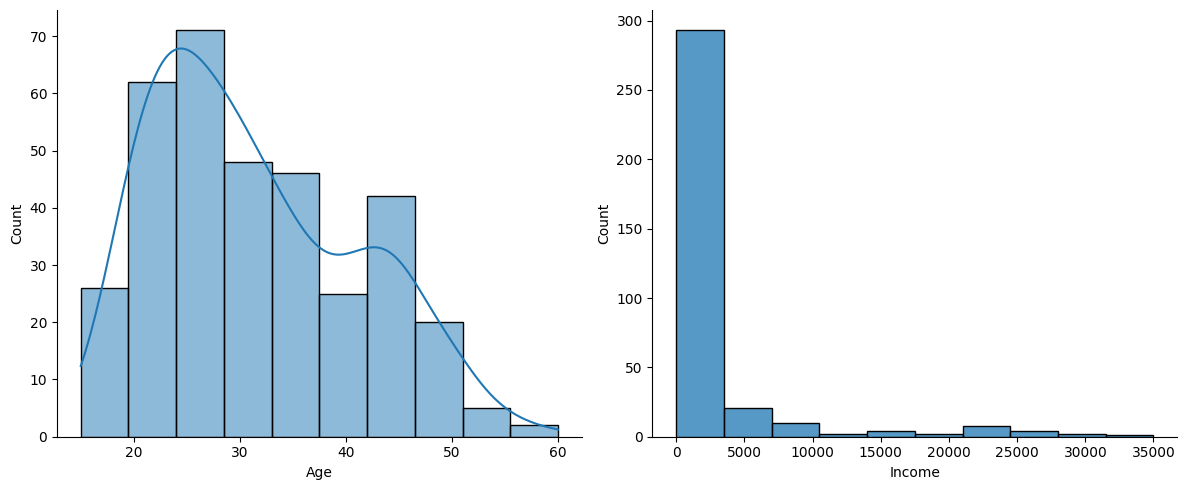

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0] = sns.histplot(df, x='Age', ax=ax[0], kde=True)
ax[1] = sns.histplot(df, x='Income', ax=ax[1])

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [19]:
df.describe().round(2)

,Age,Income,Violence,marital_binary,education_binary,employment_binary
count,347.00,347.00,347.00,347.00,347.00,347.00
mean,31.38,2110.69,0.25,0.86,1.46,0.29
std,9.60,5743.28,0.43,0.34,0.91,0.60
min,15.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,0.00,0.00,1.00,1.00,0.00
50%,30.00,0.00,0.00,1.00,1.00,0.00
75%,39.50,0.00,0.00,1.00,2.00,0.00
max,60.00,35000.00,1.00,1.00,3.00,2.00


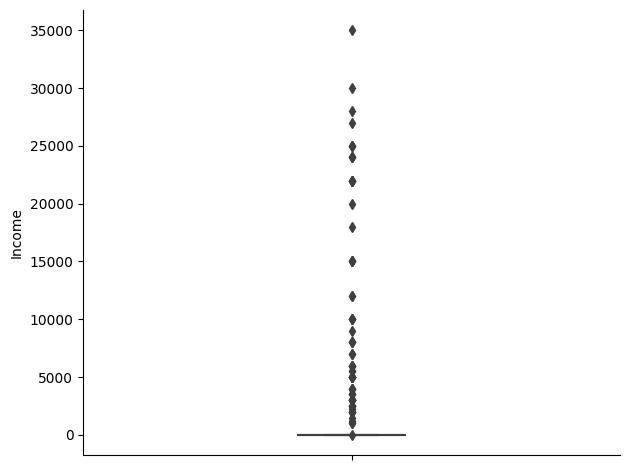

In [20]:
#Boxplot is showing outliers however this is representative data, this is why they will be kept.

sns.boxplot(df, y='Income', orient='v', width=0.2)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [21]:
mask = df['Income'] == 0
df[mask]

,Age,Education,Employment,Income,Marital status,Violence,marital_binary,education_binary,employment_binary
0,30,secondary,unemployed,0,married,1,1,2,0
1,47,tertiary,unemployed,0,married,0,1,3,0
2,24,tertiary,unemployed,0,unmarred,0,0,3,0
3,22,tertiary,unemployed,0,unmarred,0,0,3,0
4,50,primary,unemployed,0,married,1,1,1,0
...,...,...,...,...,...,...,...,...,...
267,23,secondary,unemployed,0,unmarred,0,0,2,0
268,32,primary,unemployed,0,married,1,1,1,0
344,27,primary,unemployed,0,married,1,1,1,0
345,29,primary,unemployed,0,married,0,1,1,0


Text(0.5, 1.0, 'Correlation between Features')

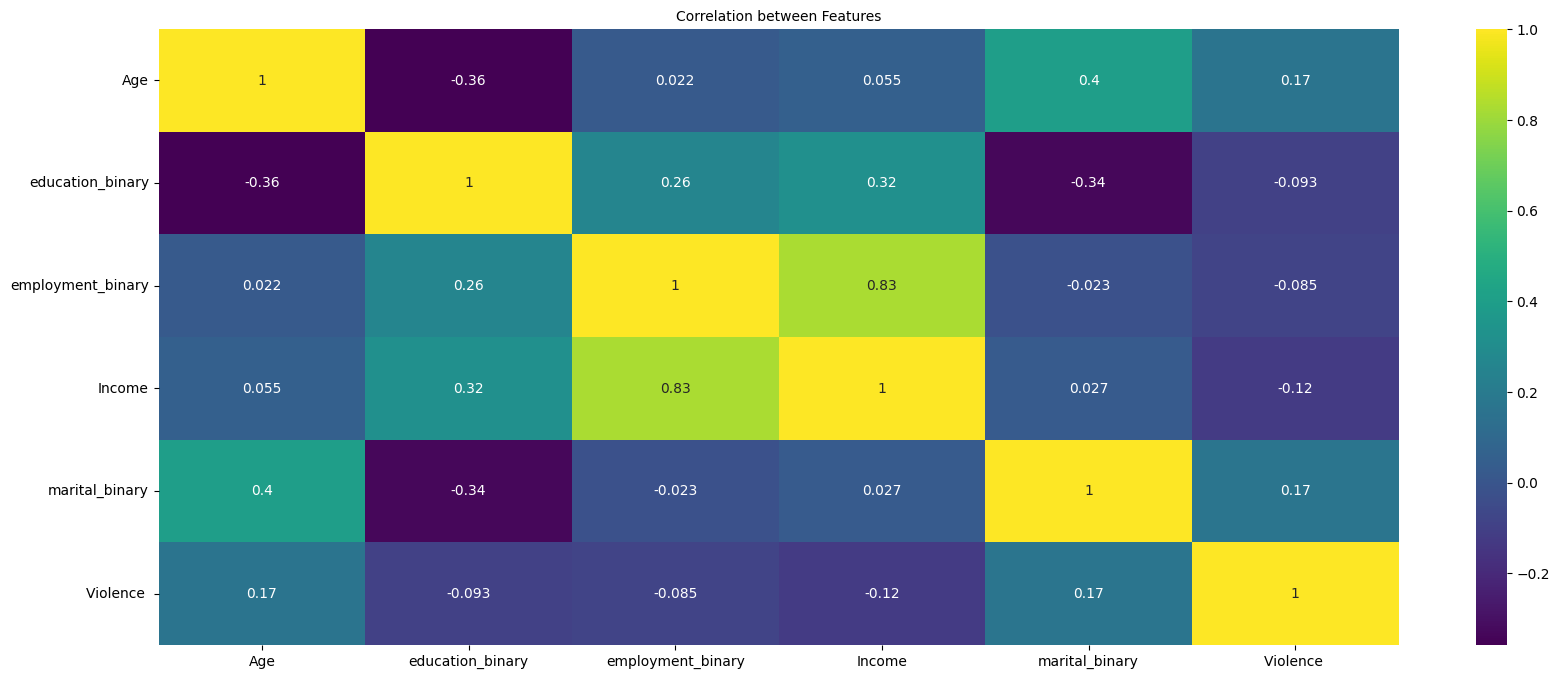

In [22]:
#Correlation between Features

df_binary = df[['Age','education_binary', 'employment_binary', 'Income', 'marital_binary', 'Violence ']]

plt.figure(figsize=(20,8))
sns.heatmap(df_binary.corr().round(3),annot=True,cmap='viridis')
plt.title("Correlation between Features", fontsize=10)

## **EDA**
    Exploratory data analysis
---------

In [23]:
df.head(10)

,Age,Education,Employment,Income,Marital status,Violence,marital_binary,education_binary,employment_binary
0,30,secondary,unemployed,0,married,1,1,2,0
1,47,tertiary,unemployed,0,married,0,1,3,0
2,24,tertiary,unemployed,0,unmarred,0,0,3,0
3,22,tertiary,unemployed,0,unmarred,0,0,3,0
4,50,primary,unemployed,0,married,1,1,1,0
5,21,tertiary,unemployed,0,unmarred,1,0,3,0
6,30,tertiary,unemployed,0,married,0,1,3,0
7,27,tertiary,unemployed,0,married,0,1,3,0
8,20,tertiary,unemployed,0,unmarred,0,0,3,0
9,18,secondary,unemployed,0,married,0,1,2,0


In [24]:
# Color palettes

palette = ['#0096c7', '#00b4d8', '#48cae4', '#90e0ef']
palette_pie = ['#0096c7','#e3f2fd', '#bbdefb','#90caf9']

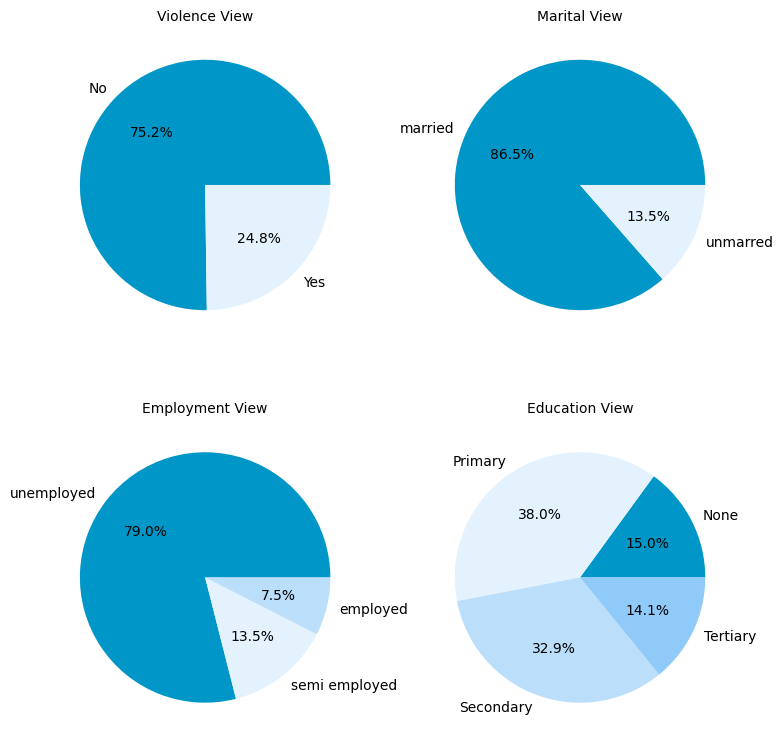

In [25]:
# Distribution of features

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

boolean_cat = ["No", "Yes"] 

axs[0,0].pie(x=df["Violence "].value_counts().values,labels=boolean_cat, autopct='%1.1f%%', colors=palette_pie)
axs[0,0].set_title("Violence View", fontsize=10)

axs[0,1].pie(x=df["marital_binary"].value_counts().values, labels=df["Marital status "].unique(), autopct="%1.1f%%", colors=palette_pie)
axs[0,1].set_title("Marital View", fontsize=10)

axs[1,0].pie(x=df["employment_binary"].value_counts().values, labels=df["Employment "].unique(), autopct="%1.1f%%", colors=palette_pie)
axs[1,0].set_title("Employment View", fontsize=10)

axs[1,1].pie(x=df["education_binary"].value_counts().sort_index().values,labels=["None", "Primary", "Secondary", 'Tertiary'], autopct="%1.1f%%", colors=palette_pie)
axs[1,1].set_title("Education View", fontsize=10)

plt.tight_layout()
plt.show()

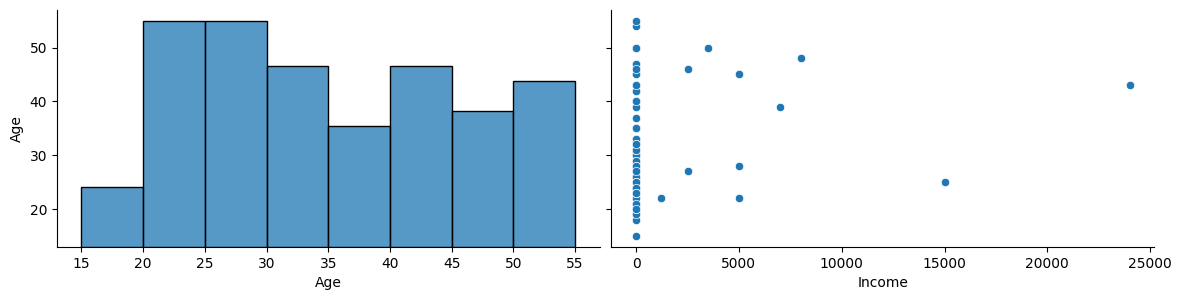

In [26]:
# Age & Income x Violence

violence_true = df['Violence '] == 1

sns.pairplot(data=df[violence_true], x_vars= ['Age','Income'], y_vars='Age', aspect=2, height=3)

sns.despine(left=False, right=True, top=True, bottom=False)

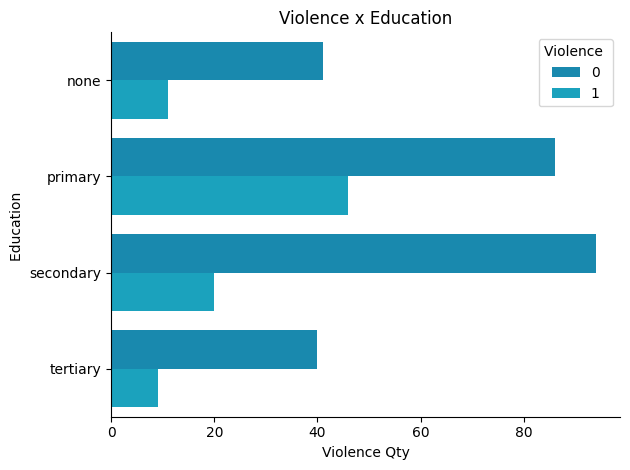

In [27]:
#Education x Violence

violence_true = df['Violence '] == 1

sns.countplot(df, y='Education ',orient='h', hue='Violence ', palette=palette, order=['none','primary','secondary','tertiary'])
plt.xlabel('Violence Qty')
plt.title('Violence x Education')
              
sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

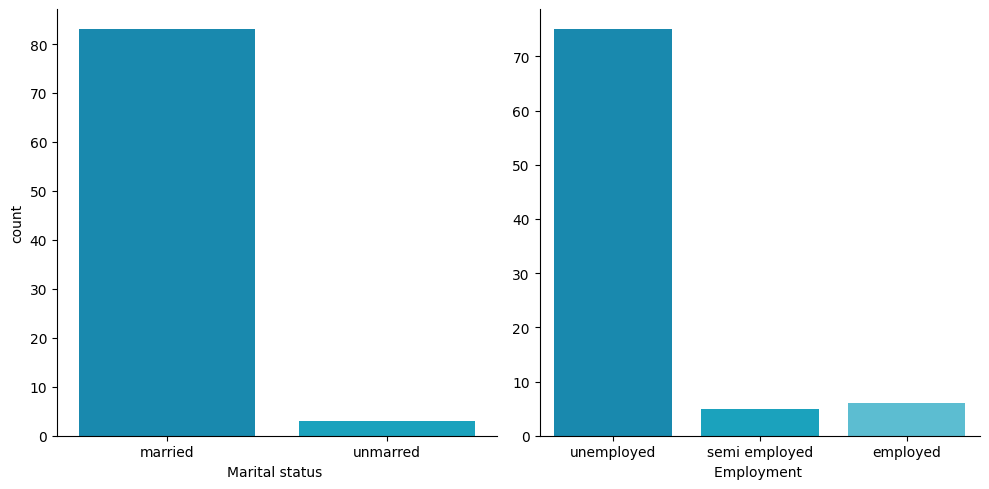

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

violence_true = df['Violence '] == 1

ax[0] = sns.countplot(df[violence_true], x='Marital status ', order=['married','unmarred'], ax=ax[0], palette=palette)
ax[0] = plt.ylabel('')

ax[1] = sns.countplot(data=df[violence_true], x='Employment ',palette=palette, ax=ax[1])
ax[1] = plt.ylabel('')

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

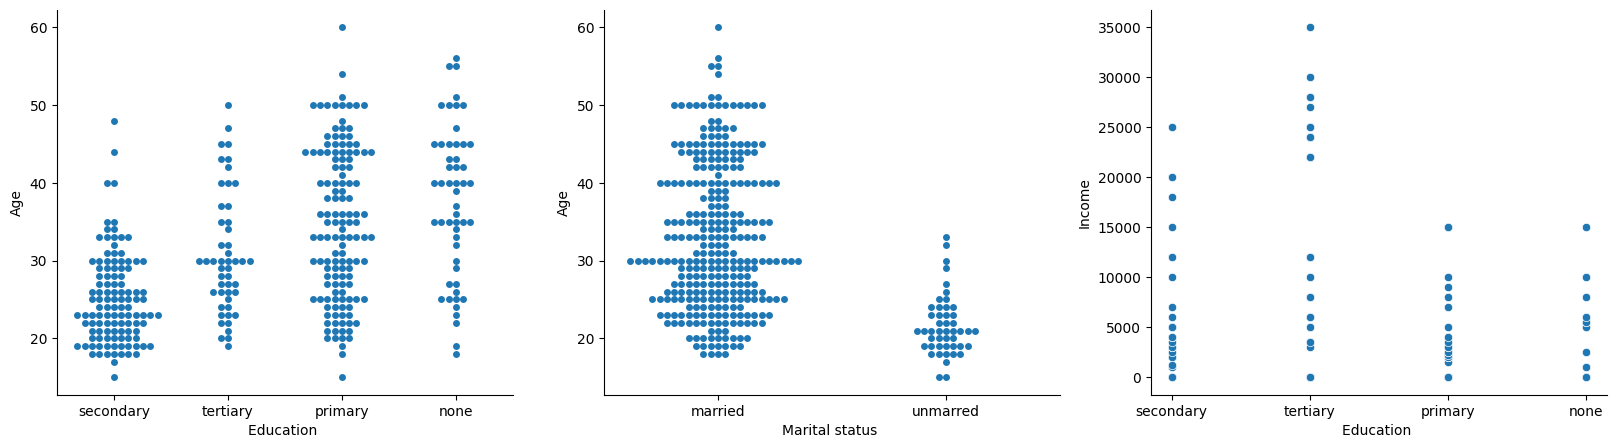

In [29]:
#Education x Age - Marital Status x Age - Education x Income
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0] = sns.swarmplot(x="Education ", y="Age", data=df, ax=ax[0])
ax[1] = sns.swarmplot(x="Marital status ", y="Age", data=df, ax=ax[1])
ax[2] = sns.scatterplot(data=df, x='Education ', y='Income', ax=ax[2])

sns.despine(left=False, right=True, top=True, bottom=False)

  Education    Income
1    primary   736.42
0       none  1221.15
2  secondary  1457.89
3   tertiary  8275.51


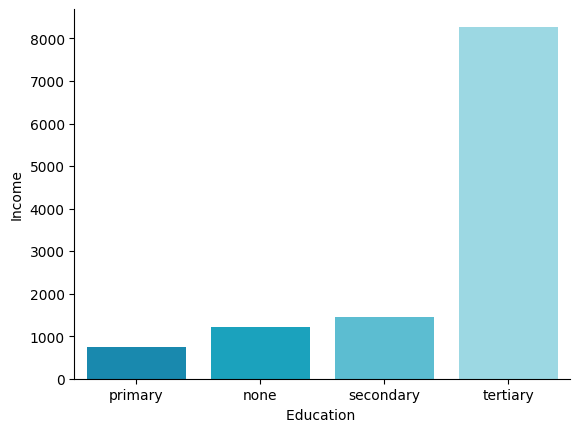

In [30]:
#Average income per Education Level

average_income_per_education = df.groupby('Education ')['Income'].mean().round(2).reset_index().sort_values(by='Income')

sns.barplot(average_income_per_education, x='Education ', y='Income',palette = palette)

print(average_income_per_education)

sns.despine(left=False, right=True, top=True, bottom=False)

**Analysis:**
--

### **Statistics**:
* There's a general good correlation between the features.
* The dataset has representative data, which means that there're possible outliers.
* The data has a positive skew, which means that the outliers are big and to the right.

### **Distribution of features in relation to Violence**:
* People with more education are less likely to commit violence.
* Domestic violence grows when the income is lower and unemployment is higher.
* The range of 20 to 30 years old show more violence towards women although it gets higher with age.

### **Distribution of features among themselves:**
* Most people are married, unemployed or semi-employed, and didn't go beyond secondary education.
* People who completed the seondary and tertiary can reach bigger incomes and people who stopped in primary education usually have the same income as people with no education.

### **Conclusion:**
* In a nutshell we have less domestic violence with higher levels of income, education and employment. In a bad economic environment the proprobility of violence rising is big.

## **ML models**
    Machine learning models
---------

In [31]:
#Binarilizing the dataset for further analysis 

binary_features = df[['Age','Income','Violence ']]
dummie_features = pd.get_dummies(df.drop(['Age', 'Income', 'Violence ', 'marital_binary', 'education_binary', 'employment_binary'],
                axis=1))

dummie_features = dummie_features.applymap(lambda x: 1 if x else 0) # Transforming True and False into 1 and 0
df_ml = pd.concat([binary_features, dummie_features], axis=1)
df_ml

,Age,Income,Violence,Education _none,Education _primary,Education _secondary,Education _tertiary,Employment _employed,Employment _semi employed,Employment _unemployed,Marital status _married,Marital status _unmarred
0,30,0,1,0,0,1,0,0,0,1,1,0
1,47,0,0,0,0,0,1,0,0,1,1,0
2,24,0,0,0,0,0,1,0,0,1,0,1
3,22,0,0,0,0,0,1,0,0,1,0,1
4,50,0,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
342,27,30000,0,0,0,0,1,0,1,0,0,1
343,26,35000,0,0,0,0,1,1,0,0,1,0
344,27,0,1,0,1,0,0,0,0,1,1,0
345,29,0,0,0,1,0,0,0,0,1,1,0


<Axes: xlabel='Violence ', ylabel='count'>

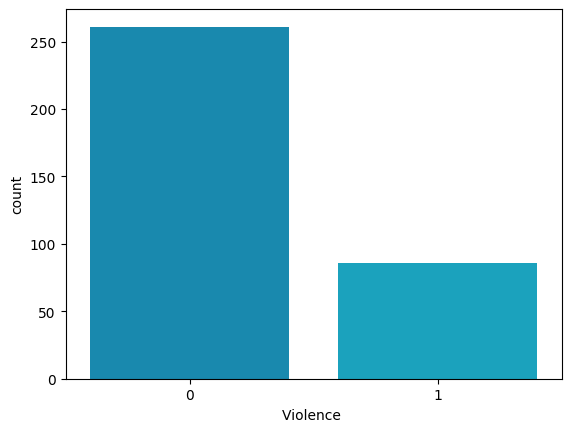

In [32]:
sns.countplot(data=df_ml, x='Violence ', palette=palette)

In [33]:
# re-sampling the dataset based on the original data. It creates new samples that are added to the data and can be used to help to train the model

from imblearn.over_sampling import SMOTE

x = df_ml.drop('Violence ', axis = 1)
y = df_ml['Violence ']

smt = SMOTE(random_state=123)
x, y = smt.fit_resample(x, y)  

df_ml = pd.concat([x, y], axis=1)

In [34]:
df_ml

,Age,Income,Education _none,Education _primary,Education _secondary,Education _tertiary,Employment _employed,Employment _semi employed,Employment _unemployed,Marital status _married,Marital status _unmarred,Violence
0,30,0,0,0,1,0,0,0,1,1,0,1
1,47,0,0,0,0,1,0,0,1,1,0,0
2,24,0,0,0,0,1,0,0,1,0,1,0
3,22,0,0,0,0,1,0,0,1,0,1,0
4,50,0,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
517,46,0,0,1,0,0,0,0,1,1,0,1
518,35,0,1,0,0,0,0,0,1,1,0,1
519,27,2500,0,0,0,0,0,0,0,1,0,1
520,40,0,0,1,0,0,0,0,1,1,0,1


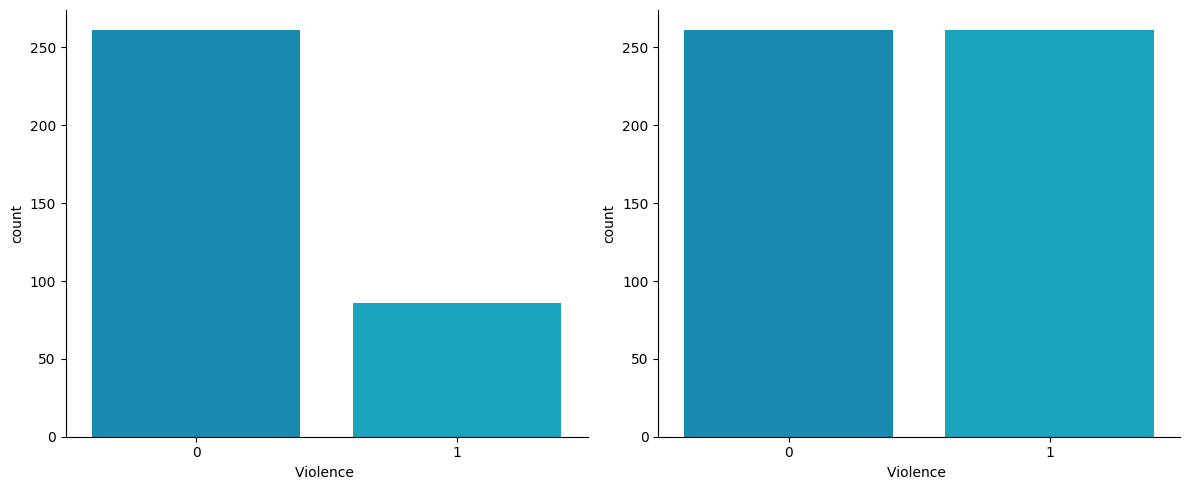

In [35]:
# Dataset re-sampled for better analysis

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0] = sns.countplot(data=df, x='Violence ', ax=ax[0], palette=palette)
ax[1] = sns.countplot(data=df_ml, x='Violence ', ax=ax[1], palette=palette)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [36]:
df_ml_sample = df_ml.sample(len(df_ml)) # It's always important to shuffle the dataset before training it otherwise the model can interpret the classes wrongly and become biased towards one of the classes.

## **Importing libraries and running models**
    Machine learning libraries and models
---------

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
#Defining the SEED, splitting the test, and normalizing X

from sklearn.preprocessing import StandardScaler

SEED = 158020
np.random.seed(SEED)

x = df_ml_sample.drop('Violence ', axis = 1)
y = df_ml_sample['Violence ']

norm = StandardScaler() # The data needs to be scaled as we have different scales among the features
x_norm = norm.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns = x.columns) # put the scaled data back in the dataframe

train_x, test_x, train_y, test_y = train_test_split(x_norm, y, test_size = 0.3, stratify = y, random_state=123)

In [39]:
#Function to run model scores

def model(x):
    accuracy = x.score(test_x,test_y) * 100
    class_atrix = classification_report(test_y,predict)
    
    print(class_atrix)
    print("Accuracy: %.2f%%" % accuracy)

In [40]:
# Dummy Classifier - Baseline to evaluate the performance of other models

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified') # Respecting the distribution of data
dummy.fit(train_x, train_y)
predict = dummy.predict(test_x)

model(dummy)

              precision    recall  f1-score   support

           0       0.49      0.44      0.47        79
           1       0.49      0.54      0.51        78

    accuracy                           0.49       157
   macro avg       0.49      0.49      0.49       157
weighted avg       0.49      0.49      0.49       157

Accuracy: 48.41%


In [41]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(train_x, train_y)
predict = bnb.predict(test_x)

model(bnb)

              precision    recall  f1-score   support

           0       0.66      0.53      0.59        79
           1       0.60      0.72      0.65        78

    accuracy                           0.62       157
   macro avg       0.63      0.62      0.62       157
weighted avg       0.63      0.62      0.62       157

Accuracy: 62.42%


In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(train_x, train_y)
predict = tree.predict(test_x)

model(tree)

              precision    recall  f1-score   support

           0       0.55      0.86      0.67        79
           1       0.67      0.28      0.40        78

    accuracy                           0.57       157
   macro avg       0.61      0.57      0.53       157
weighted avg       0.61      0.57      0.53       157

Accuracy: 57.32%


In [43]:
from sklearn.svm import SVC

SEED = 158020
np.random.seed(SEED)

svc = SVC()
svc.fit(train_x, train_y)
predict = svc.predict(test_x)

model(svc)

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        79
           1       0.67      0.74      0.71        78

    accuracy                           0.69       157
   macro avg       0.70      0.69      0.69       157
weighted avg       0.70      0.69      0.69       157

Accuracy: 69.43%


In [44]:
from sklearn.neighbors import KNeighborsClassifier as knn

knn = knn(metric='euclidean')
knn.fit(train_x, train_y)
predict = knn.predict(test_x)

model(knn)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        79
           1       0.76      0.76      0.76        78

    accuracy                           0.76       157
   macro avg       0.76      0.76      0.76       157
weighted avg       0.76      0.76      0.76       157

Accuracy: 75.80%


In [45]:
from sklearn.neighbors import KNeighborsClassifier as knn

knn = knn(metric='hamming', n_neighbors=4) # Hamming distance is more suitable for binary data.
knn.fit(train_x, train_y)
predict = knn.predict(test_x)

model(knn)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        79
           1       0.76      0.72      0.74        78

    accuracy                           0.75       157
   macro avg       0.75      0.75      0.74       157
weighted avg       0.75      0.75      0.75       157

Accuracy: 74.52%


In [46]:
from sklearn.ensemble import RandomForestClassifier

SEED = 158020
np.random.seed(SEED)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_x, train_y)
predict = rf.predict(test_x)

model(rf)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        79
           1       0.75      0.77      0.76        78

    accuracy                           0.76       157
   macro avg       0.76      0.76      0.76       157
weighted avg       0.76      0.76      0.76       157

Accuracy: 75.80%


In [47]:
# Cross validation and Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [48]:
#Function to run model scores

def print_results(results):
  mean = results['test_score'].mean()
  std = results['test_score'].std()
  print("Average Accuracy: %.2f" % (mean * 100))
  print("Accuracy interval: [%.2f, %.2f]" % ((mean - 2 * std)*100, (mean + 2 * std) * 100))

In [49]:
# Cross validation DecisionTreeClassifier

SEED = 158020
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)
tree_cross = DecisionTreeClassifier(max_depth=2)
results = cross_validate(tree_cross, x_norm, y, cv = cv, return_train_score=False)
print_results(results)

Average Accuracy: 53.64
Accuracy interval: [46.11, 61.18]


In [50]:
# Cross validation KNN

from sklearn.neighbors import KNeighborsClassifier as knn

SEED = 158020
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)
knn_cross = knn(metric='hamming', n_neighbors=3)
results = cross_validate(knn_cross, x_norm, y, cv = cv, return_train_score=False)

print_results(results)

Average Accuracy: 76.03
Accuracy interval: [63.09, 88.97]


In [51]:
# Cross validation RandomForestClassifier

SEED = 158020
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)
random_tree = RandomForestClassifier(n_estimators=100)
results = cross_validate(random_tree, x_norm, y, cv = cv, return_train_score=False)

print_results(results)

Average Accuracy: 77.58
Accuracy interval: [68.00, 87.16]


In [52]:
# Grid Search KNN

from sklearn.neighbors import KNeighborsClassifier as knn

SEED = 158020
np.random.seed(SEED)

param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn(), param_grid, cv=KFold(n_splits = 10, shuffle=True))
grid_search.fit(train_x, train_y)
predict = grid_search.predict(test_x)


model(grid_search)
print("Best number of neighbors:", grid_search.best_params_['n_neighbors'])

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        79
           1       0.75      0.74      0.75        78

    accuracy                           0.75       157
   macro avg       0.75      0.75      0.75       157
weighted avg       0.75      0.75      0.75       157

Accuracy: 75.16%
Best number of neighbors: 7


In [53]:
# Grid Search Random Forest

SEED = 158020
np.random.seed(SEED)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=KFold(n_splits = 10, shuffle=True))
grid_search.fit(train_x, train_y)
predict = grid_search.predict(test_x)

model(grid_search)
print(f"Best parameters found: {grid_search.best_params_}")

              precision    recall  f1-score   support

           0       0.76      0.75      0.75        79
           1       0.75      0.76      0.75        78

    accuracy                           0.75       157
   macro avg       0.75      0.75      0.75       157
weighted avg       0.75      0.75      0.75       157

Accuracy: 75.16%
Best parameters found: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


**Analysis:**
--

#### **Base models**:
* The KNN and the Random Forest are the models with better results, both around 79%. KNN has the best balance.

#### **Cross Validation**:
* Random Forest has the best score but with a big interval which is negative

#### **Grid Search**:
* Both KNN and Random forest performed well and improved the base models

#### **Results:**
* To improve the general accuracy of the models we can explore more metrics and get more data. Both Random Forest and KNN are a good match to this dataset. They don't show overfitting and are well balanced, around 20 percentage points above the Dummy.

### **Conclusion:**
* There's less domestic violence with higher levels of income, education and employment. In a bad economic environment the proprobility of violence rising is big.
* To improve the accuracy of predcitions in the models we can explore more metrics and get more data. Both Random Forest and KNN are a good match to this dataset.

## **Thank You for taking the time to view this Notebook**!
​
If you found this analysis helpful or have any feedback or suggestions, don't hesitate to say! 

#### **Contact:**

* LinkedIn - linkedin.com/in/leonardo-terra-97b592124
* Portfolio - linktr.ee/leonardoterra 